In [1]:
!wget https://zenodo.org/records/14513554/files/jss-data.zip

--2024-12-18 12:17:01--  https://zenodo.org/records/14513554/files/jss-data.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 606354627 (578M) [application/octet-stream]
Saving to: ‘jss-data.zip’

jss-data.zip        100%[===================>] 578.26M  19.4MB/s    in 41s     

2024-12-18 12:17:43 (14.0 MB/s) - ‘jss-data.zip’ saved [606354627/606354627]



In [2]:
!unzip jss-data.zip

Archive:  jss-data.zip
   creating: dataset/
   creating: dataset/python/
  inflating: dataset/python/valid.jsonl  
  inflating: dataset/python/test.jsonl  
  inflating: dataset/python/train.jsonl  
  inflating: dataset/python/labels.pkl  
  inflating: dataset/python/dataset.jsonl  
   creating: dataset/java/
  inflating: dataset/java/labels.pkl  
  inflating: dataset/java/train.jsonl  
  inflating: dataset/java/valid.jsonl  
  inflating: dataset/java/test.jsonl  
  inflating: dataset/java/dataset.jsonl  
   creating: dataset/javascript/
  inflating: dataset/javascript/dataset.jsonl  
  inflating: dataset/javascript/labels.pkl  
  inflating: dataset/javascript/valid.jsonl  
  inflating: dataset/javascript/train.jsonl  
  inflating: dataset/javascript/test.jsonl  
   creating: dataset/csharp/
  inflating: dataset/csharp/dataset.jsonl  
  inflating: dataset/csharp/labels.pkl  
  inflating: dataset/csharp/valid.jsonl  
  inflating: dataset/csharp/train.jsonl  
  inflating: dataset/csharp/

In [3]:
ELEGANT_NAMES = {'codebert': 'CodeBERT',
                 'codebert-baseline': 'CodeBERTrand',
                 'codeberta': 'CodeBERTa',
                 'codet5': 'CodeT5',
                 'graphcodebert': 'GraphCodeBERT',
                 'roberta': 'RoBERTa',
                 'distilbert': 'DistilBERT',
                 'bert': 'BERT',
                 'distilroberta': 'DistilRoBERTa'
                 }

In [4]:
import glob
import os
import pickle
import pandas as pd

def read_results(run_dir):
    data = {'model': [], 'lang': [], 'layer': [], 'rank': [],
            'precision': [], 'recall': [], 'f1': []}
    for file in glob.glob(run_dir + "/*/metrics.log"):
        parent = os.path.dirname(file).split('/')[-1]
        if 'multilingual' in parent:
            continue
        print(parent)
        model, lang, layer, rank = parent.split('_')
        with open(file, 'rb') as f:
            results = pickle.load(f)
        data['model'].append(model)
        data['lang'].append(lang)
        data['layer'].append(int(layer))
        data['rank'].append(int(rank))
        data['precision'].append(results['test_precision'])
        data['recall'].append(results['test_recall'])
        data['f1'].append(results['test_f1'])
    df = pd.DataFrame(data)
    df_renamed = df.replace(ELEGANT_NAMES)
    return df_renamed

In [5]:
results = read_results('runs')

codebert-baseline_java_6_128
graphcodebert_php_3_128
codet5_java_2_128
codebert-baseline_c_7_128
codebert-baseline_php_5_128
codebert_javascript_1_128
codebert-baseline_java_8_128
distilroberta_c_1_128
distilbert_python_4_128
codebert_go_9_128
distilroberta_python_1_128
roberta_c_8_128
codebert_javascript_8_128
bert_ruby_5_128
codebert_c_1_128
codebert-baseline_java_7_128
roberta_go_4_128
codeberta_ruby_2_128
bert_c_8_128
codebert_php_12_128
codeberta_csharp_1_128
codet5_python_10_128
distilroberta_php_4_128
codebert-baseline_python_10_128
graphcodebert_javascript_2_128
bert_csharp_9_128
codet5_go_6_128
bert_php_3_128
bert_java_9_128
codebert_ruby_4_128
codebert-baseline_go_3_128
codebert-baseline_c_2_128
roberta_c_9_128
codet5_java_10_128
graphcodebert_python_3_128
distilbert_java_1_128
bert_c_10_128
codebert_python_7_128
codebert-baseline_java_2_128
distilbert_php_1_128
codet5_php_6_128
distilroberta_csharp_2_128
codebert_python_8_128
roberta_c_11_128
distilbert_ruby_3_128
distilbert

# Best layer per model

In [6]:
group_by_model = results.groupby(['model', 'layer'])['f1'].mean().reset_index()
best_layer_per_model = (
        group_by_model
        .groupby(['model'])
        .apply(lambda group: group.loc[group['f1'] == group['f1'].max()])
        .reset_index(level=-1, drop=True)
    )
best_layer_per_model

/tmp/ipykernel_10942/3923421252.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.loc[group['f1'] == group['f1'].max()])


,model,layer,f1
model,,,
BERT,BERT,8,0.576137
CodeBERT,CodeBERT,5,0.721812
CodeBERTa,CodeBERTa,4,0.646863
CodeBERTrand,CodeBERTrand,10,0.382887
CodeT5,CodeT5,7,0.674512
DistilBERT,DistilBERT,4,0.583237
DistilRoBERTa,DistilRoBERTa,4,0.630875
GraphCodeBERT,GraphCodeBERT,4,0.722337
RoBERTa,RoBERTa,5,0.643162


# Table 1

In [7]:
from IPython.display import Markdown

best_layer_per_model_dict = best_layer_per_model[['model', 'layer']].to_dict('records')
results_dict = results.to_dict('records')
results_dict_filtered = [r for r in results_dict
                             if {'model': r['model'], 'layer': r['layer']} in best_layer_per_model_dict]
results_filtered = pd.DataFrame.from_records(results_dict_filtered)[['model', 'lang', 'f1']]
Markdown(results_filtered.to_markdown(index=False))


| model         | lang       |     f1 |
|:--------------|:-----------|-------:|
| DistilBERT    | python     | 0.5446 |
| BERT          | c          | 0.5831 |
| DistilRoBERTa | php        | 0.6103 |
| CodeBERTrand  | python     | 0.3231 |
| DistilBERT    | javascript | 0.526  |
| CodeBERT      | java       | 0.681  |
| CodeBERTrand  | javascript | 0.3205 |
| DistilBERT    | go         | 0.6393 |
| RoBERTa       | go         | 0.7181 |
| GraphCodeBERT | go         | 0.7932 |
| CodeBERTrand  | java       | 0.3112 |
| DistilBERT    | php        | 0.5802 |
| BERT          | javascript | 0.5306 |
| CodeT5        | go         | 0.7436 |
| CodeBERT      | python     | 0.7047 |
| RoBERTa       | php        | 0.6222 |
| CodeBERTa     | python     | 0.6111 |
| CodeT5        | csharp     | 0.8515 |
| GraphCodeBERT | csharp     | 0.8778 |
| BERT          | ruby       | 0.4486 |
| RoBERTa       | python     | 0.6124 |
| CodeBERTrand  | c          | 0.3741 |
| CodeBERTa     | java       | 0.5936 |
| CodeT5        | python     | 0.643  |
| CodeT5        | javascript | 0.6103 |
| BERT          | csharp     | 0.7796 |
| CodeT5        | php        | 0.6705 |
| GraphCodeBERT | ruby       | 0.635  |
| CodeBERT      | c          | 0.732  |
| DistilBERT    | ruby       | 0.4488 |
| GraphCodeBERT | javascript | 0.6584 |
| DistilRoBERTa | ruby       | 0.5149 |
| CodeBERTrand  | php        | 0.3922 |
| DistilRoBERTa | c          | 0.6418 |
| DistilBERT    | java       | 0.5377 |
| CodeBERTrand  | go         | 0.4021 |
| RoBERTa       | javascript | 0.5813 |
| DistilRoBERTa | csharp     | 0.8096 |
| CodeBERT      | csharp     | 0.8839 |
| BERT          | php        | 0.5789 |
| BERT          | java       | 0.5144 |
| CodeBERTrand  | csharp     | 0.6556 |
| GraphCodeBERT | php        | 0.6875 |
| CodeBERTrand  | ruby       | 0.2843 |
| CodeBERTa     | csharp     | 0.8329 |
| CodeBERT      | ruby       | 0.6211 |
| DistilBERT    | c          | 0.5974 |
| CodeT5        | c          | 0.6707 |
| RoBERTa       | java       | 0.5849 |
| CodeBERTa     | javascript | 0.5892 |
| DistilRoBERTa | go         | 0.7093 |
| RoBERTa       | csharp     | 0.8321 |
| CodeBERT      | javascript | 0.6683 |
| RoBERTa       | c          | 0.6665 |
| CodeBERTa     | go         | 0.7225 |
| CodeBERTa     | c          | 0.6601 |
| CodeBERTa     | php        | 0.641  |
| GraphCodeBERT | python     | 0.713  |
| CodeBERTa     | ruby       | 0.5245 |
| DistilRoBERTa | python     | 0.6112 |
| CodeBERT      | php        | 0.7003 |
| DistilRoBERTa | javascript | 0.578  |
| GraphCodeBERT | java       | 0.6881 |
| CodeT5        | ruby       | 0.5942 |
| CodeT5        | java       | 0.6123 |
| DistilRoBERTa | java       | 0.5719 |
| DistilBERT    | csharp     | 0.7919 |
| BERT          | go         | 0.6415 |
| RoBERTa       | ruby       | 0.5278 |
| CodeBERT      | go         | 0.7832 |
| GraphCodeBERT | c          | 0.7257 |
| BERT          | python     | 0.5324 |

# Statistical test (GraphCodeBERT vs CodeBERT, CodeBERTa vs RoBERTa)

In [8]:
from scipy.stats import wilcoxon

codebert_f1 = results_filtered[results_filtered['model']=='CodeBERT'].sort_values(by='lang', ascending=True, inplace=False)['f1']
gcodebert_f1 = results_filtered[results_filtered['model']=='GraphCodeBERT'].sort_values(by='lang', ascending=True, inplace=False)['f1']
print(wilcoxon(codebert_f1, gcodebert_f1))

codeberta_f1 = results_filtered[results_filtered['model']=='CodeBERTa'].sort_values(by='lang', ascending=True, inplace=False)['f1']
roberta_f1 = results_filtered[results_filtered['model']=='RoBERTa'].sort_values(by='lang', ascending=True, inplace=False)['f1']
print(wilcoxon(codeberta_f1, roberta_f1))

WilcoxonResult(statistic=np.float64(15.0), pvalue=np.float64(0.7421875))
WilcoxonResult(statistic=np.float64(10.0), pvalue=np.float64(0.3125))


# Figures 4 and 5

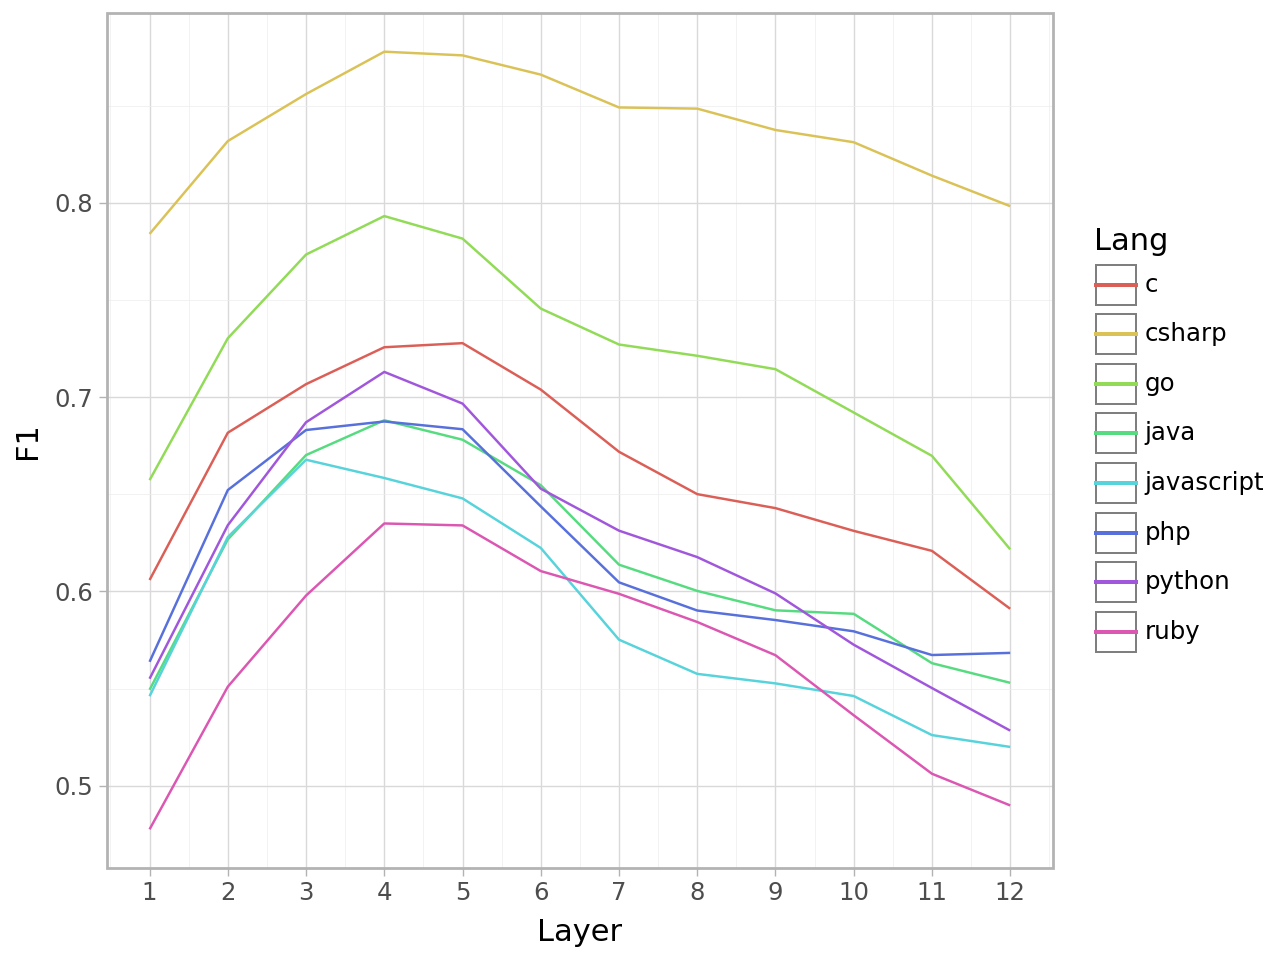

In [9]:
from plotnine import *
layer_vs_f1 = (
                ggplot(results[(results['model'] == 'GraphCodeBERT')])
                + aes(x="layer", y="f1", color='lang')
                + geom_line()
                + scale_x_continuous(breaks=range(0, 13, 1))
                + labs(x="Layer", y="F1", color="Lang")
                + theme(text=element_text(size=16))
                + theme_light()
        )
layer_vs_f1

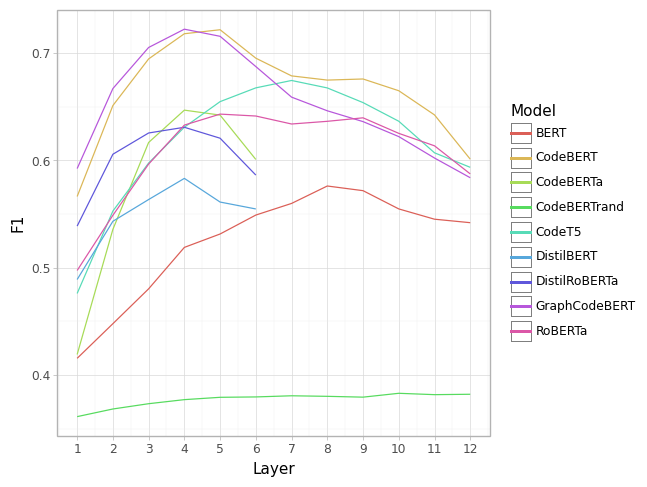

In [10]:
layer_vs_f1 = (
            ggplot(group_by_model)
            + aes(x="layer", y="f1", color='model')
            + geom_line()
            + scale_x_continuous(breaks=range(0, 13, 1))
            + labs(x="Layer", y="F1", color="Model")
            + theme_light()
    )
layer_vs_f1.draw()

# Language independent statistical test (Kendall's W)

In [11]:
import numpy as np

def kendalls_w(rank_matrix):
    """
    Compute Kendall's W (coefficient of concordance) for a given ranking matrix.

    Parameters:
    rank_matrix (numpy.ndarray): A 2D array where rows represent items and columns represent judges.

    Returns:
    float: The Kendall's W coefficient.
    """
    # Step 1: Convert input to a numpy array
    rank_matrix = np.array(rank_matrix)
    n, m = rank_matrix.shape  # n = number of items, m = number of judges
    
    # Step 2: Compute row sums (sum of ranks for each item)
    rank_sums = np.sum(rank_matrix, axis=1)
    
    # Step 3: Compute the mean rank
    mean_rank = np.mean(rank_sums)
    
    # Step 4: Compute S (sum of squared deviations from mean rank)
    S = np.sum((rank_sums - mean_rank) ** 2)
    
    # Step 5: Compute Kendall's W using the formula
    numerator = 12 * S
    denominator = m**2 * (n**3 - n)
    W = numerator / denominator
    
    return W

In [12]:
from scipy.stats import rankdata

for model in np.unique(results['model']):
    langs = np.unique(results['lang'])
    
    ratings = []
    for l in langs:
        data = results[(results['model'] == model) & (results['lang'] == l)].sort_values(by='layer', ascending=True, inplace=False)['f1'].to_numpy()
        ratings.append(data)
    
    ratings = np.asarray(ratings)
    ranked_data = np.array([rankdata(row) for row in ratings])
    print(f'{model}, W={kendalls_w(ranked_data.T):.4f}')

BERT, W=0.9441
CodeBERT, W=0.9231
CodeBERTa, W=0.9786
CodeBERTrand, W=0.6747
CodeT5, W=0.9397
DistilBERT, W=0.8429
DistilRoBERTa, W=0.8179
GraphCodeBERT, W=0.9541
RoBERTa, W=0.8453


# Direct transfer

In [13]:
from prettytable import PrettyTable

table = PrettyTable()

languages = np.unique(results['lang'])

table.field_names = ['source/target'] + languages.tolist()

rows = []
for source in languages:
    row = [source]
    for target in languages:
        log = f'transfer/{source}_{target}.log'
        with open(log, 'rb') as f:
            results_transfer = pickle.load(f)
        f1 = results_transfer['test_f1']
        row.append(f1)
    rows.append(row)

table.add_rows(rows)
print(table)
        

+---------------+--------+--------+--------+--------+------------+--------+--------+--------+
| source/target |   c    | csharp |   go   |  java  | javascript |  php   | python |  ruby  |
+---------------+--------+--------+--------+--------+------------+--------+--------+--------+
|       c       | 0.7321 | 0.4488 | 0.2133 | 0.2386 |   0.3278   | 0.1693 | 0.2367 | 0.1721 |
|     csharp    | 0.3476 | 0.884  | 0.2556 | 0.3581 |   0.3585   | 0.188  | 0.2291 | 0.191  |
|       go      | 0.3018 | 0.3841 | 0.7832 | 0.2705 |   0.3909   | 0.1562 | 0.3946 | 0.2465 |
|      java     | 0.3575 | 0.5925 | 0.1673 | 0.6812 |   0.378    | 0.1889 | 0.215  | 0.225  |
|   javascript  | 0.3959 | 0.4635 | 0.3481 | 0.3467 |   0.6682   | 0.1334 | 0.4303 | 0.3198 |
|      php      | 0.177  | 0.4091 | 0.2176 | 0.2621 |   0.2486   | 0.7005 | 0.2113 | 0.1397 |
|     python    | 0.2765 | 0.3829 | 0.3478 | 0.246  |   0.3995   | 0.1563 | 0.7047 | 0.3648 |
|      ruby     | 0.2134 | 0.3001 | 0.2288 | 0.1823 |   0.29

# Shared subspace

In [14]:
with open('runs/multilingual_CodeBERT/metrics.log', 'rb') as f:
    results_transfer = pickle.load(f)

for l in languages:
    print(f'F1 score {l}: {results_transfer[f"test_f1_{l}"]:.4f}')

F1 score c: 0.6890
F1 score csharp: 0.8293
F1 score go: 0.7178
F1 score java: 0.6292
F1 score javascript: 0.6262
F1 score php: 0.6629
F1 score python: 0.6454
F1 score ruby: 0.5675
